In [12]:
from tensorflow import keras
(x_train ,y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
train_scaled = x_train / 255.0
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, y_train, test_size = 0.2, random_state = 42)

In [13]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model


In [14]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
sgd = keras.optimizers.SGD()
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [24]:
model.fit(train_scaled, train_target)

1500/1500 [==============================] - 4s 2ms/step - loss: 0.4784 - accuracy: 0.8327


In [25]:
import matplotlib.pyplot as plt

In [26]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

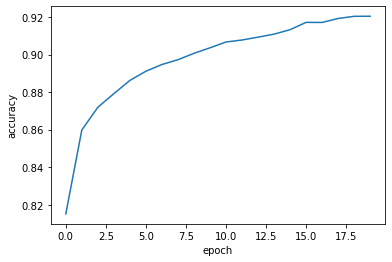

 실행시간 : 0.05797410011291504


In [33]:
import time
start_time = time.time()
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
end_time = time.time()
print(f' 실행시간 : {end_time - start_time}')

In [38]:
start_time = time.time()
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1, validation_data = (val_scaled, val_target))
end_time = time.time()
print(f' 실행시간 : {end_time - start_time}')


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5333 - accuracy: 0.8150 - val_loss: 0.4489 - val_accuracy: 0.8418
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3983 - accuracy: 0.8591 - val_loss: 0.3922 - val_accuracy: 0.8584
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3603 - accuracy: 0.8700 - val_loss: 0.3984 - val_accuracy: 0.8562
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.8799 - val_loss: 0.3462 - val_accuracy: 0.8770
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3136 - accuracy: 0.8861 - val_loss: 0.3495 - val_accuracy: 0.8754
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2961 - accuracy: 0.8908 - val_loss: 0.3296 - val_accuracy: 0.8838
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.8952 - val_loss: 0.3558 - val_accuracy:

In [35]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10250930869099737431
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10090381312
locality {
  bus_id: 1
  links {
  }
}
incarnation: 695038254286568468
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


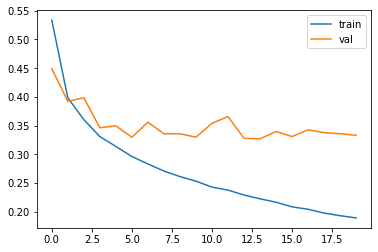

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

In [40]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5284 - accuracy: 0.8174 - val_loss: 0.4216 - val_accuracy: 0.8522
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3968 - accuracy: 0.8583 - val_loss: 0.3941 - val_accuracy: 0.8602
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3561 - accuracy: 0.8714 - val_loss: 0.3703 - val_accuracy: 0.8654
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3289 - accuracy: 0.8782 - val_loss: 0.3373 - val_accuracy: 0.8785
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3086 - accuracy: 0.8864 - val_loss: 0.3296 - val_accuracy: 0.8810
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8909 - val_loss: 0.3289 - val_accuracy: 0.8796
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.8970 - val_loss: 0.3315 - val_accuracy:

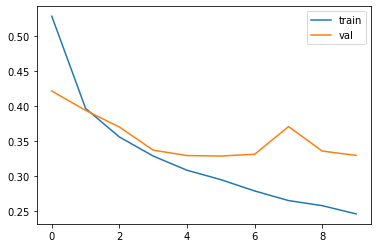

 실행시간 : 28.91174554824829


In [42]:
start_time = time.time()
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 1, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()
end_time = time.time()
print(f' 실행시간 : {end_time - start_time}')


In [43]:
start_time = time.time()
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
early_stopping = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
model.fit(train_scaled, train_target, epochs = 10, verbose = 1, validation_data = (val_scaled, val_target), callbacks = early_stopping)

end_time = time.time()
print(f' 실행시간 : {end_time - start_time}')

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5245 - accuracy: 0.8176 - val_loss: 0.4197 - val_accuracy: 0.8506
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8587 - val_loss: 0.3732 - val_accuracy: 0.8673
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3539 - accuracy: 0.8711 - val_loss: 0.3570 - val_accuracy: 0.8714
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3269 - accuracy: 0.8806 - val_loss: 0.3599 - val_accuracy: 0.8703
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.8854 - val_loss: 0.3371 - val_accuracy: 0.8783
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2924 - accuracy: 0.8921 - val_loss: 0.3346 - val_accuracy: 0.8824
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.8957 - val_loss: 0.3258 - val_accuracy:

In [44]:
print(early_stopping.stopped_epoch)

8
